# Лабораторная работа 1. Деревья классификации.
## Булыгин Максим

Подключаем библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from scipy import stats
import os

Импортируем данные.

In [2]:
df = pd.read_csv('winequality-red.csv', sep = ";")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Проверяем данные.

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Заметим, что в каждом столбце есть "аномально-большие" наблюдения. Посмотрим на ящики с усами, возможно у нас много выбросов.

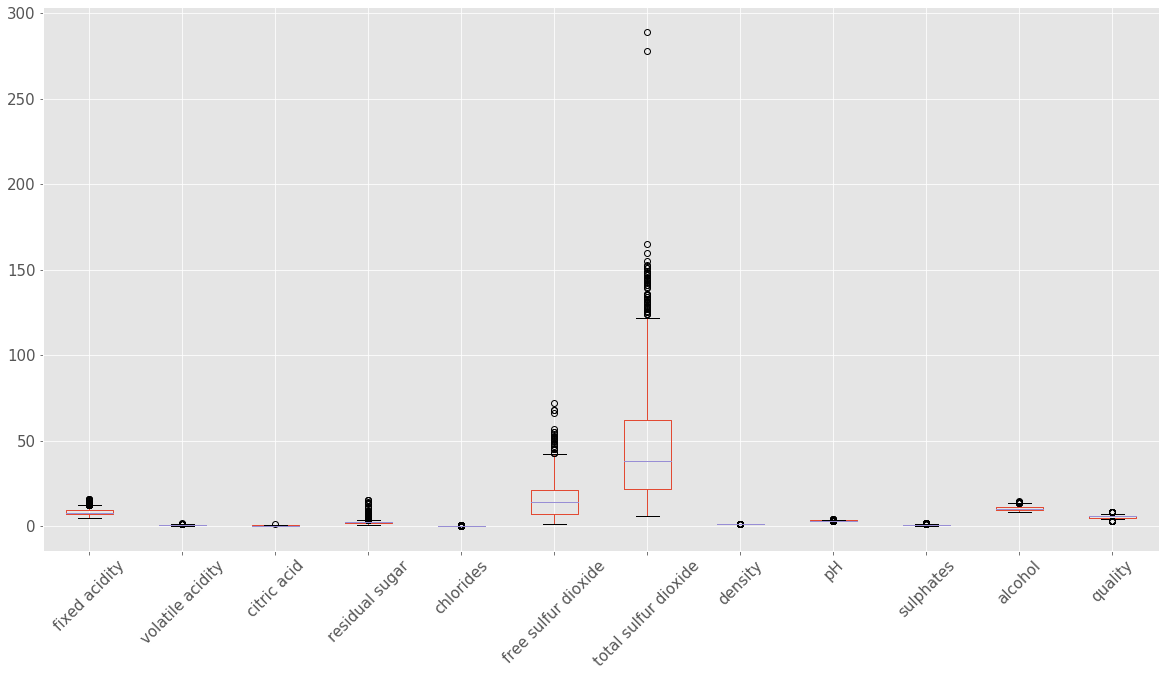

In [5]:
df.boxplot(figsize=(20,10), rot=45, fontsize=15)

Из картинки ничего не понятно, так как данные несопоставимы. Для определения количества выбросов стандартизуем данные и посмотрим на ящики с усами стандартизованных данных.

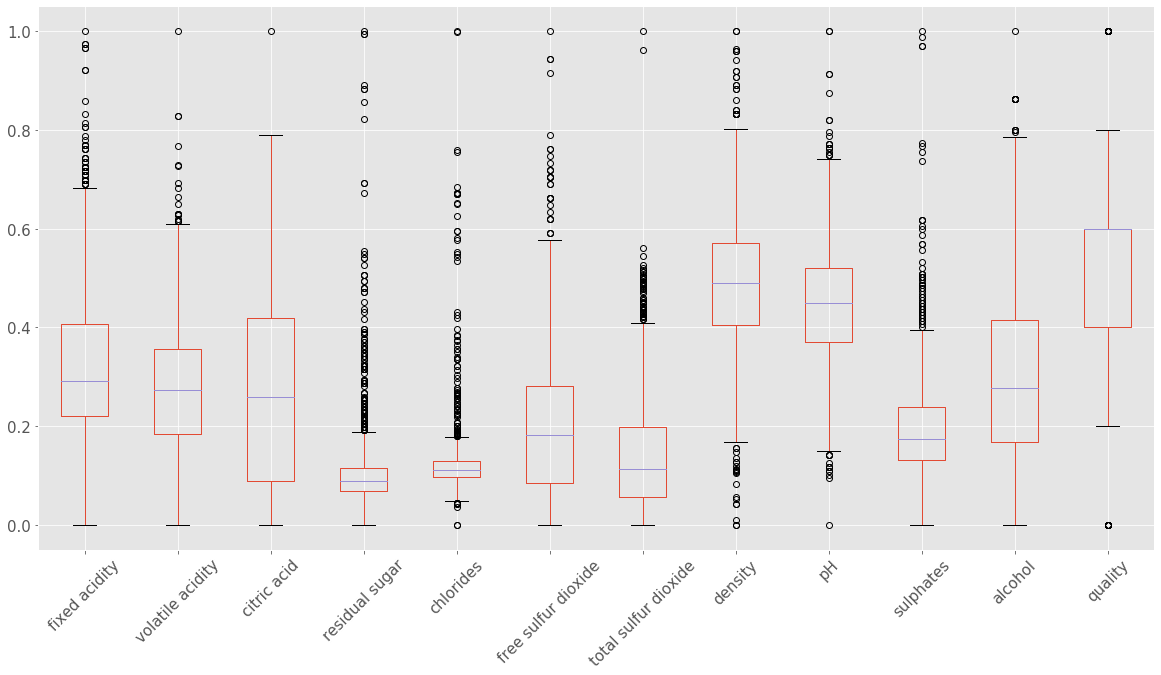

In [6]:
from sklearn import preprocessing
stand = preprocessing.MinMaxScaler()
df_standed = df.copy()
df_standed[list(df.columns)] = stand.fit_transform(df)
df_standed.boxplot(figsize=(20,10), rot=45, fontsize=15)

Огромное количество выбросов. Возможно наши переменные имеют нормальное распределение и мы сможем воспользоваться правилом трех сигм и удалить наблюдения в каждом столбце, выходящие за интервал $(\bar{y} - \sigma, \bar{y} - \sigma)$? Проверим гипотезы о нормальности распределения наших переменных.

In [7]:
for col in set(df.columns):
    if stats.shapiro(df[col])[1] > 0.05:
        print("Так как p-value > 0.05, то не отколоняем нулевую гипотезу о нормальности распределения:\n\
        переменная " + col + " имеет нормальное распределение с вероятностью 0.95")
    else:
        print("Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:\n\
        переменная " + col + " не имеет нормальное распределение с вероятностью 0.95")

Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная fixed acidity не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная pH не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная free sulfur dioxide не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная density не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная volatile acidity не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная quality не имеет нормальное распределение с 

Возможно они имеют log-нормальное распределение?

In [8]:
for col in set(df.columns):
    if stats.shapiro(np.log(df[col]))[1] > 0.05:
        print("Так как p-value > 0.05, то не отколоняем нулевую гипотезу о нормальности распределения:\n\
        переменная " + col + " имеет нормальное распределение с вероятностью 0.95")
    else:
        print("Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:\n\
        переменная " + col + " не имеет нормальное распределение с вероятностью 0.95")

Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная fixed acidity не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная pH не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная free sulfur dioxide не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная density не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная volatile acidity не имеет нормальное распределение с вероятностью 0.95
Так как p-value < 0.05, то отколоняем нулевую гипотезу о нормальности распределения:
        переменная quality не имеет нормальное распределение с 

C:\Games\anaconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Как видим, наши параметры не имеют ни нормальное, ни log-нормальное распределение. Нужно удалять выбросы по-другому.

Огромное количество наблюений выходит за верхний "ус" ящика, то есть их значения больше $Q_3 + 1.5(Q_3 - Q_1)$. Выбросы будут искажать и портить модель классификации. Удаляем выбросы: удалим наблюдения, выходищяие за предел "усов" (нижних и верхних) ящиков с усами. Придется жертвовать количеством наблюдений.

In [9]:
# находим верхние и нижние границы ящиков с усами
bound = []
for i in list(df.columns):
    q1 = df[i].quantile(q=0.25)
    q3 = df[i].quantile(q=0.75)
    bound.append([q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)])
bound

[[3.95, 12.349999999999998],
 [0.015000000000000013, 1.0150000000000001],
 [-0.4049999999999999, 0.9149999999999999],
 [0.8499999999999996, 3.6500000000000004],
 [0.04000000000000002, 0.11999999999999998],
 [-14.0, 42.0],
 [-38.0, 122.0],
 [0.9922475000000002, 1.0011874999999997],
 [2.925, 3.6849999999999996],
 [0.28000000000000014, 0.9999999999999999],
 [7.1000000000000005, 13.5],
 [3.5, 7.5]]

Создадим копию датафрейма, в которой будем удалять наблюдения, выходящие за верхние и нижние границы ящиков с усами.

In [10]:
col = list(df.columns)
df1 = df.copy()
for i in range(len(bound)):
    df1 = df1[(df1[col[i]] > bound[i][0]) & (df1[col[i]] < bound[i][1])]

Исправилась ли ситуация?

In [11]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,8.161650,0.522963,0.246760,2.184524,0.078588,14.984694,42.124150,0.996581,3.324600,0.631318,10.352452,5.624150
std,1.459478,0.164364,0.179571,0.440907,0.014325,8.763159,25.929986,0.001594,0.131856,0.116241,0.964454,0.721626
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,56.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,41.000000,121.000000,1.001000,3.680000,0.980000,13.400000,7.000000


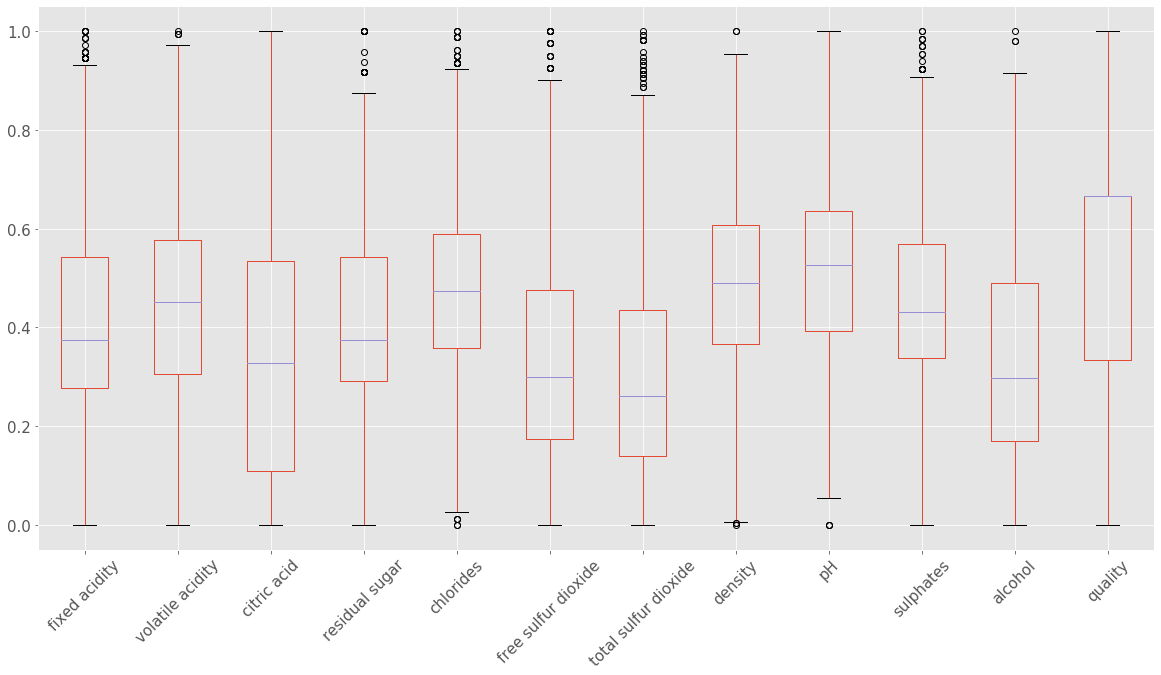

In [12]:
df1_standed = df1.copy()
df1_standed[list(df1.columns)] = stand.fit_transform(df1)
df1_standed.boxplot(figsize=(20,10), rot=45, fontsize=15)

Ситуация лучше, но все еще много выбросов. Продолжаем удалять выбросы.

In [13]:
bound = []
for i in list(df.columns):
    q1 = df1[i].quantile(q=0.25)
    q3 = df1[i].quantile(q=0.75)
    bound.append([q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)])
for i in range(len(bound)):
    df1 = df1[(df1[col[i]] > bound[i][0]) & (df1[col[i]] < bound[i][1])]

In [14]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,8.072945,0.523169,0.238480,2.162380,0.077712,14.673040,40.475143,0.996513,3.331329,0.624637,10.350510,5.631931
std,1.344087,0.164465,0.174093,0.417319,0.013076,8.225191,23.737376,0.001539,0.126441,0.109979,0.958775,0.725010
min,5.200000,0.120000,0.000000,1.200000,0.043000,1.000000,6.000000,0.992420,2.980000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.250000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.230000,2.100000,0.078000,13.000000,35.000000,0.996560,3.330000,0.610000,10.100000,6.000000
75%,8.900000,0.635000,0.380000,2.400000,0.086000,20.000000,54.000000,0.997457,3.410000,0.690000,11.000000,6.000000
max,11.800000,0.980000,0.730000,3.400000,0.113000,37.000000,106.000000,1.000600,3.680000,0.920000,13.000000,7.000000


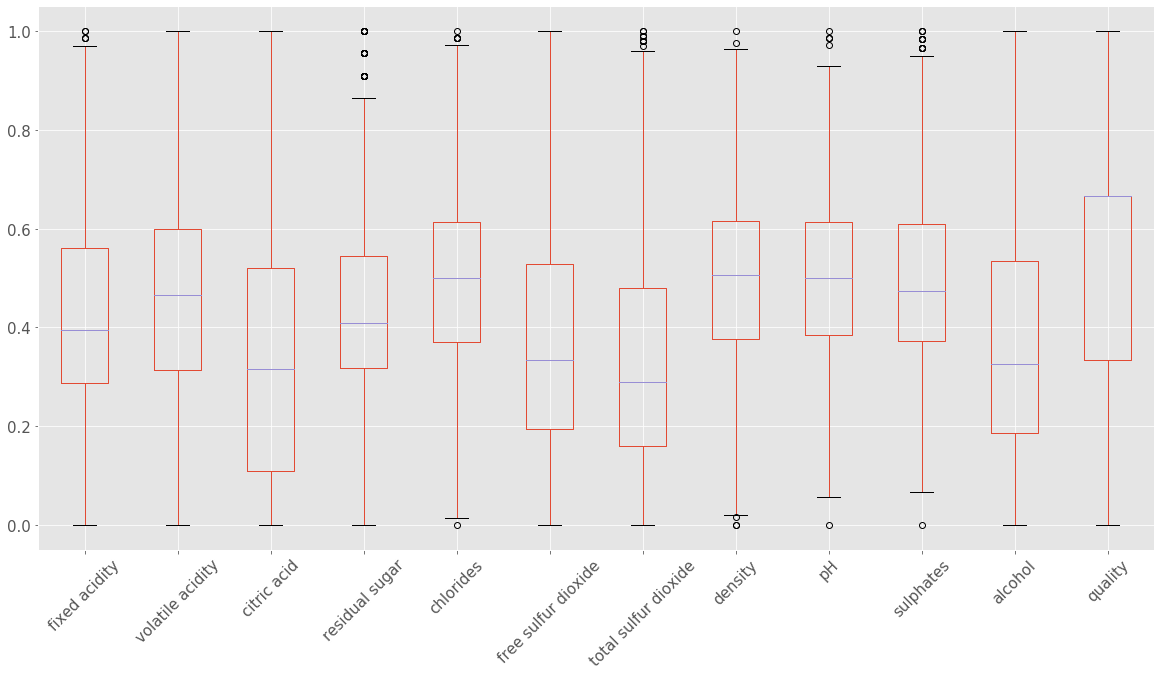

In [15]:
df1_standed = df1.copy()
df1_standed[list(df1.columns)] = stand.fit_transform(df1)
df1_standed.boxplot(figsize=(20,10), rot=45, fontsize=15)

Еще раз.

In [16]:
bound = []
for i in list(df.columns):
    q1 = df1[i].quantile(q=0.25)
    q3 = df1[i].quantile(q=0.75)
    bound.append([q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)])
for i in range(len(bound)):
    df1 = df1[(df1[col[i]] > bound[i][0]) & (df1[col[i]] < bound[i][1])]

In [17]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000
mean,8.014891,0.522244,0.234767,2.128232,0.077355,14.572906,39.435367,0.996443,3.333992,0.622647,10.355567,5.638056
std,1.300766,0.163570,0.172482,0.374538,0.012698,8.127899,22.535817,0.001466,0.123429,0.105169,0.951989,0.718953
min,5.200000,0.120000,0.000000,1.200000,0.044000,1.000000,6.000000,0.992580,3.020000,0.370000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.255000,0.550000,9.500000,5.000000
50%,7.700000,0.520000,0.230000,2.100000,0.077000,13.000000,35.000000,0.996490,3.340000,0.600000,10.100000,6.000000
75%,8.800000,0.635000,0.370000,2.400000,0.085000,19.000000,52.000000,0.997400,3.410000,0.685000,11.000000,6.000000
max,11.600000,0.980000,0.690000,3.100000,0.111000,37.000000,101.000000,1.000240,3.630000,0.890000,13.000000,7.000000


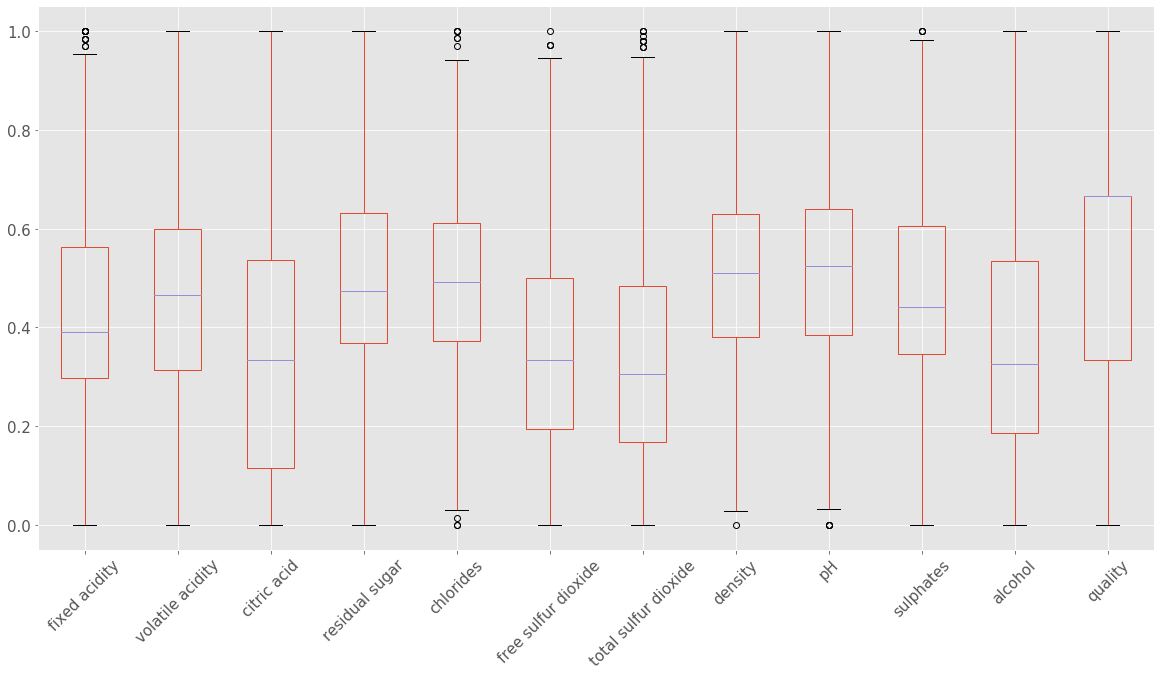

In [18]:
df1_standed = df1.copy()
df1_standed[list(df1.columns)] = stand.fit_transform(df1)
df1_standed.boxplot(figsize=(20,10), rot=45, fontsize=15)

Еще раз.

In [19]:
bound = []
for i in list(df.columns):
    q1 = df1[i].quantile(q=0.25)
    q3 = df1[i].quantile(q=0.75)
    bound.append([q1 - 1.5 * (q3 - q1), q3 + 1.5 * (q3 - q1)])
for i in range(len(bound)):
    df1 = df1[(df1[col[i]] > bound[i][0]) & (df1[col[i]] < bound[i][1])]

In [20]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,7.964432,0.523530,0.229535,2.128324,0.077169,14.429189,38.725405,0.996436,3.337546,0.621384,10.344829,5.634595
std,1.223321,0.164655,0.168357,0.369520,0.012252,8.005856,21.750162,0.001437,0.119795,0.104293,0.947036,0.718112
min,5.200000,0.120000,0.000000,1.200000,0.046000,1.000000,6.000000,0.992800,3.040000,0.370000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.260000,0.550000,9.500000,5.000000
50%,7.700000,0.520000,0.230000,2.100000,0.077000,13.000000,34.000000,0.996500,3.340000,0.600000,10.100000,6.000000
75%,8.800000,0.640000,0.360000,2.400000,0.085000,19.000000,52.000000,0.997400,3.410000,0.680000,11.000000,6.000000
max,11.300000,0.980000,0.680000,3.100000,0.109000,35.000000,96.000000,1.000200,3.620000,0.880000,13.000000,7.000000


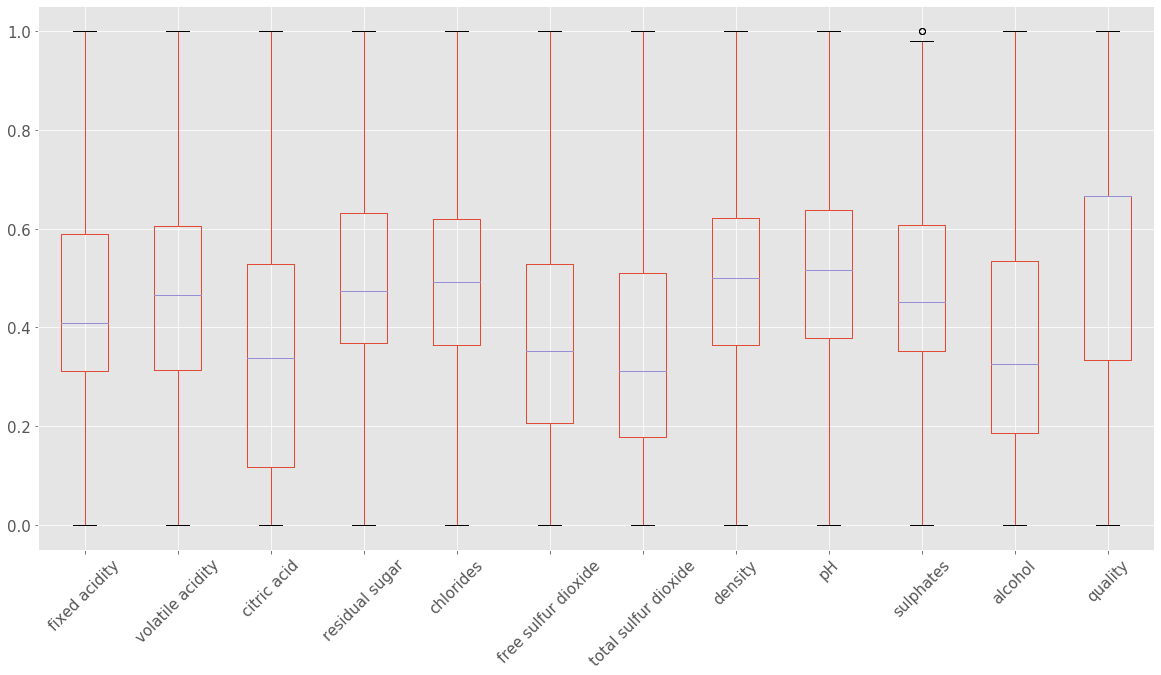

In [21]:
df1_standed = df1.copy()
df1_standed[list(df1.columns)] = stand.fit_transform(df1)
df1_standed.boxplot(figsize=(20,10), rot=45, fontsize=15)

Ситуация исправилась. Остался всего один выброс. Уберем его вручную.

In [22]:
df1 = df1[df1["sulphates"] < df1["sulphates"].quantile(q=0.75) 
    + 1.5 * (df1["sulphates"].quantile(q=0.75) - df1["sulphates"].quantile(q=0.25))]

In [23]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,7.960888,0.523982,0.228982,2.127952,0.077197,14.421452,38.736728,0.996436,3.337595,0.620823,10.342434,5.631636
std,1.220530,0.164545,0.168060,0.369717,0.012241,7.996410,21.761900,0.001437,0.119920,0.103708,0.945626,0.716066
min,5.200000,0.120000,0.000000,1.200000,0.046000,1.000000,6.000000,0.992800,3.040000,0.370000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.260000,0.550000,9.500000,5.000000
50%,7.700000,0.520000,0.230000,2.100000,0.077000,13.000000,34.000000,0.996500,3.340000,0.600000,10.100000,6.000000
75%,8.800000,0.640000,0.360000,2.400000,0.085000,19.000000,52.000000,0.997400,3.410000,0.680000,11.000000,6.000000
max,11.300000,0.980000,0.680000,3.100000,0.109000,35.000000,96.000000,1.000200,3.620000,0.870000,13.000000,7.000000


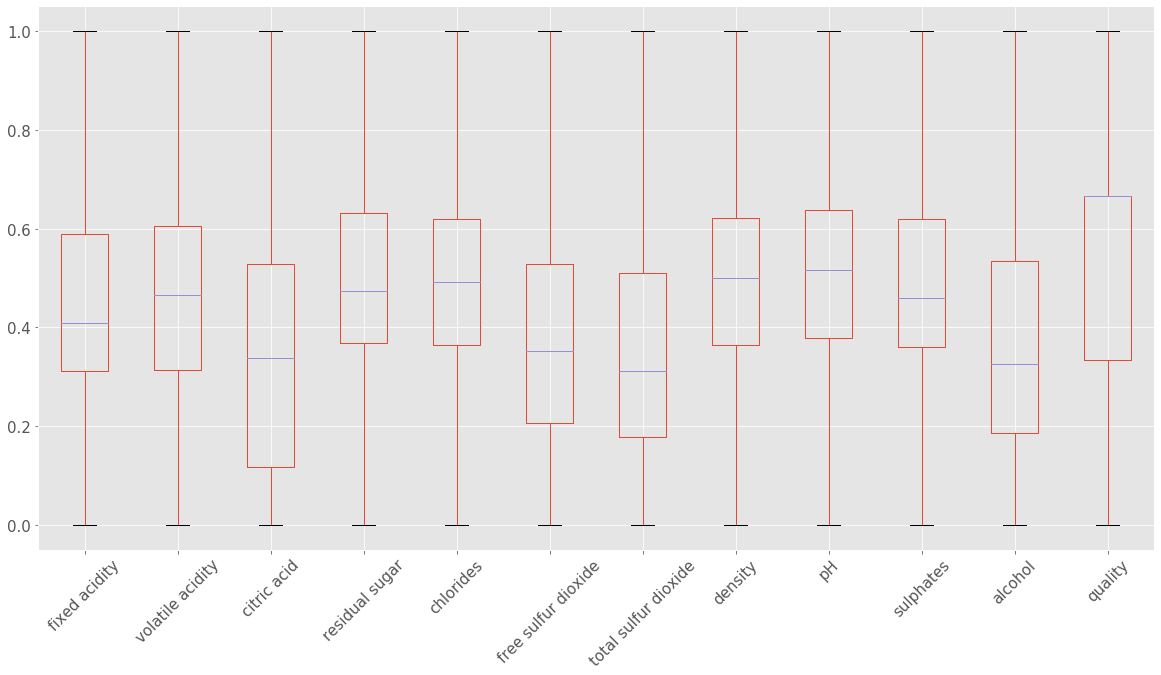

In [24]:
df1_standed = df1.copy()
df1_standed[list(df1.columns)] = stand.fit_transform(df1)
df1_standed.boxplot(figsize=(20,10), rot=45, fontsize=15)

Удалили все выбросы. Заметим, что изначальное число наблюдений было 1599, а стало 923 - то есть изначально в данных было порядка 676-ти выбросов.

Проверим, сбалансированны ли классы качеств вина, которые нам надо классифицировать.

In [25]:
df1['quality'].value_counts()

6    406
5    388
7    102
4     27
Name: quality, dtype: int64

Очевидно, значение качества вина равное четырем значительно меньше других. Скажем, что качество вина 4 незначительно отличается от качества вина 5, то есть 4 заменим на 5, для сбалансированности.

In [26]:
df1['quality'] = df1['quality'].replace(4, 5)
df1['quality'].value_counts()

5    415
6    406
7    102
Name: quality, dtype: int64

Заметим, что в исходном наборе данных у нас 6 классов: теперь, будем считать что три - качества 5, 6 и 7 соответственно.

Разделяем предикторы и отклики.

In [27]:
y = df1["quality"]
x = df1.drop(columns = ["quality"])

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Разделяем наблюедния на тестовую и обучающую выборки.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1337) 

Найдем параметры глубины, количества элементов в узле и количества элементов в потомке grid-search'ем.

In [30]:
model_gr = DecisionTreeClassifier(random_state=54,
                               criterion='gini',
                               max_depth=6,
                               min_samples_split=10,
                               min_samples_leaf=8,
                               min_impurity_decrease=0.001,                 
                               splitter='best')

In [31]:
params_set = {
'max_depth': [6, 7, 8, 9, 10],
'min_samples_leaf': [2, 4, 6, 8, 10],
'min_samples_split': [2, 4, 6, 8, 10]
}

gr_CV = GridSearchCV(estimator=model_gr,
       param_grid=params_set,
       scoring='balanced_accuracy',
       cv=5,
       n_jobs=-1)
gr_CV.fit(X_train, y_train)
best_hyperparams = gr_CV.best_params_
best_CV_score = gr_CV.best_score_
best_model = gr_CV.best_estimator_
test_acc = best_model.score(X_test,y_test)

print('Лучшие значения гиперпараметров:',best_hyperparams)
print('Лучшее accuracy на обучающей выборке:', np.round(best_CV_score * 100, 4))
print('Лучшее accuracy на тестовой выборке', np.round(test_acc * 100 , 4))
y_gr_pred_train, y_gr_pred_test = best_model.predict(X_train), best_model.predict(X_test)
conf_mat_1 = confusion_matrix(y_test, y_gr_pred_test)
conf_mat_1 = pd.DataFrame(conf_mat_1, index=best_model.classes_, columns=best_model.classes_)
conf_mat_1

Лучшие значения гиперпараметров: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Лучшее accuracy на обучающей выборке: 61.5955
Лучшее accuracy на тестовой выборке 63.8989


C:\Games\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,5,6,7
5,92,33,1
6,40,71,10
7,3,13,14


Значимость переменных в классифицкаиции с нахождением параметров grid-search'ем.

In [32]:
pd.DataFrame({'feature': df1.iloc[:, :-1].columns,
              'importance': best_model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
10,alcohol,0.221295
6,total sulfur dioxide,0.122304
3,residual sugar,0.118316
9,sulphates,0.102729
4,chlorides,0.085010
0,fixed acidity,0.069925
7,density,0.068231
2,citric acid,0.065154
8,pH,0.062385
1,volatile acidity,0.051989


Все переменные значимы: отбрасывать незначимые переменные и переобучать модель не нужно.

Попробуем подобрать параметры модели, по аналогии с лекцией, методом покоординатного спуска - мало ли, найдем параметры, которые дадут более хорошую точность, чем параметры, полученные в grid-search. В результате эмпирических попыток был получен локальный оптимум при max_depth=8, min_samples_split=6, min_samples_leaf=2.

In [33]:
model = DecisionTreeClassifier(random_state=54,
                               criterion='gini',
                               max_depth=8,
                               min_samples_split=6,
                               min_samples_leaf=2,
                               min_impurity_decrease=0.001,
                               min_weight_fraction_leaf=0,
                               splitter='best')
model.fit(X_train, y_train)
y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
print('Лучшее accuracy на обучающей выборке:', np.round(accuracy_score(y_train, y_pred_train)*100, 4))
print('Лучшее accuracy на тестовой выборке:', np.round(accuracy_score(y_test, y_pred_test)*100, 4))
conf_mat_2 = confusion_matrix(y_test, y_pred_test)
conf_mat_2 = pd.DataFrame(conf_mat_1, index=model.classes_, columns=model.classes_)
conf_mat_2

Лучшее accuracy на обучающей выборке: 85.4489
Лучшее accuracy на тестовой выборке: 65.343


,5,6,7
5,92,33,1
6,40,71,10
7,3,13,14


Значимость переменных в классифицкаиции с нахождением параметров методом покоординатного спуска.

In [34]:
pd.DataFrame({'feature': df1.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
10,alcohol,0.245975
3,residual sugar,0.139230
6,total sulfur dioxide,0.107428
9,sulphates,0.103313
4,chlorides,0.095072
7,density,0.074914
2,citric acid,0.065797
1,volatile acidity,0.061649
0,fixed acidity,0.059373
8,pH,0.032967


Все переменные значимы: отбрасывать незначимые переменные и переобучать модель не нужно.

Оценим качество полученных моделей. Во-первых, все параметры значимы. Во-вторых, у обоих моделей оказалось близкое к 65-ти процентам значение accuracy на тестовой выборке (и, соответственно, количество неправильно классифицированных наблюдений примерно равно в обоих моделях). Сравним качество моделей по таким критериям качества как точность, полнота, и Ф-мера в следующих таблицах.

In [35]:
print(classification_report(y_test, y_pred_test))
print(classification_report(y_test, y_gr_pred_test))

              precision    recall  f1-score   support

           5       0.65      0.75      0.70       126
           6       0.64      0.58      0.61       121
           7       0.71      0.57      0.63        30

    accuracy                           0.65       277
   macro avg       0.67      0.63      0.64       277
weighted avg       0.65      0.65      0.65       277

              precision    recall  f1-score   support

           5       0.68      0.73      0.70       126
           6       0.61      0.59      0.60       121
           7       0.56      0.47      0.51        30

    accuracy                           0.64       277
   macro avg       0.62      0.59      0.60       277
weighted avg       0.64      0.64      0.64       277



Как видно из таблиц, модель, в которой параметры искались методом покоординатного спуска, является чуть лучше, чем модель, в которой параметры искались Grid Search'ем. Поэтому, в качестве наилучшей модели выберем модель, в которой параметры искались методом покоординатного спуска.

Графическая иллюстрация дерева классификации по модели, признанной наилучшей.

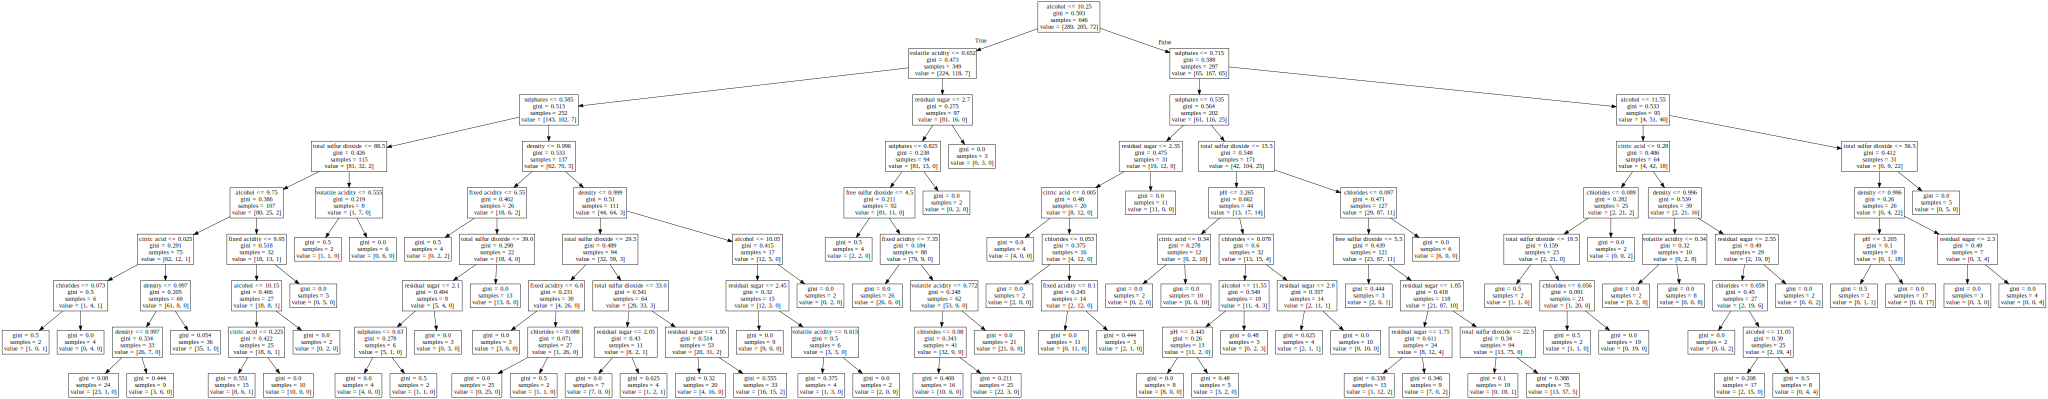

In [36]:
from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(model, out_file=None, feature_names=x.columns))

Вывод: таким образом, в ходе лабораторной работы была выполнена обработка данных (избавление от выбросов, количество которых составило более шестисот наблюдений), после чего было получено две модели - одна с подбором параметров Grid Seach'ем, другая с подбором параметров покоординатным спуском, объем обучающей выборки был 66% от исходной выборки, а тестовой - 33%. Обе модели показали примерно одинаковые результаты с точки зрения качества моделей, однако модель, полученная подбором параметров покоординатным спуском, оказалась чуть лучше и она была выбрана в качестве наилучшей модели. Также, все исходные параметры модели оказались значимы. На выходе имеем модель классификации, которая имееет на тестовой выборке accuracy 65%, а на обучающей - 85% - другими словами, только каждое третье наблюдение из тестовой выборки будет классифицировано неправильно.